In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import sys

/kaggle/input/credit-card-transactions/sd254_users.csv
/kaggle/input/credit-card-transactions/User0_credit_card_transactions.csv
/kaggle/input/credit-card-transactions/sd254_cards.csv
/kaggle/input/credit-card-transactions/credit_card_transactions-ibm_v2.csv
/kaggle/input/mcc-list/MerchantCategoryCodeList.xlsx


In [2]:
#CREDIT CARD TRANSACTION DATA

df = pd.read_csv('/kaggle/input/credit-card-transactions/credit_card_transactions-ibm_v2.csv')

df2 = df[['Card','Year','Month','Day','Time', 'Amount', 'Use Chip', 'Merchant City', 'Merchant State', 'MCC']]

df2['Amount'] = df2['Amount'].str[1:].astype(float) #Cut $ signs and change dtype to float

#Keep data only in the years between 2009 to 2019
df2 = df2.loc[df2['Year'] > 2008]
df2 = df2.loc[df2['Year'] < 2020]

df2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant City,Merchant State,MCC
2188,0,2009,1,1,06:16,135.48,Swipe Transaction,La Verne,CA,5311
2189,0,2009,1,3,06:44,43.53,Swipe Transaction,La Verne,CA,5912
2190,0,2009,1,3,11:29,1031.86,Swipe Transaction,San Diego,CA,3058
2191,0,2009,1,3,20:19,55.65,Swipe Transaction,La Verne,CA,5812
2192,0,2009,1,4,05:51,155.76,Swipe Transaction,La Verne,CA,5912


In [3]:
#MCC CODE

mcc = pd.read_excel('/kaggle/input/mcc-list/MerchantCategoryCodeList.xlsx')

mcc = mcc.dropna() #drop na row

mcc[['MCC CODE']] =  mcc[['MCC CODE']].astype(int) #CHANGE COLUMN DATA TYPE

mcc.head()

,MCC CODE,Program Type
0,742,Veterinary Services
1,763,Agricultural Cooperatives
2,780,Landscaping and Horticultural Services
3,1520,General Contractor/Residential Building
4,1711,"Heating, Plumbing, Air Conditioning Contractors"


In [4]:
#pandas merges https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html

merge_df = pd.merge(df2, mcc, left_on = 'MCC', right_on = 'MCC CODE', how = 'left')

merge_df.head()

,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant City,Merchant State,MCC,MCC CODE,Program Type
0,0,2009,1,1,06:16,135.48,Swipe Transaction,La Verne,CA,5311,5311,Department Stores
1,0,2009,1,3,06:44,43.53,Swipe Transaction,La Verne,CA,5912,5912,Drug Stores and Pharmacies
2,0,2009,1,3,11:29,1031.86,Swipe Transaction,San Diego,CA,3058,3058,Delta
3,0,2009,1,3,20:19,55.65,Swipe Transaction,La Verne,CA,5812,5812,Eating Places and Restaurants
4,0,2009,1,4,05:51,155.76,Swipe Transaction,La Verne,CA,5912,5912,Drug Stores and Pharmacies


In [5]:
#GROUPBY

amount_by_year = merge_df[['Year', 'Amount']].groupby(['Year']).sum()

amount_by_year['Year'] = amount_by_year.index.astype(float) #Make index a normal column

amount_by_year.head()

#amount_by_year['Year'] = pd.to_datetime(amount_by_year['Year'].astype(str), format = '%Y') #Set year column to date format

##amount_by_year = amount_by_year.drop([2002, 2020]) #drop outlier rows

,Amount,Year
Year,,
2009,59309602.29,2009.0
2010,65282113.16,2010.0
2011,68101612.40,2011.0
2012,69615991.79,2012.0
2013,71350680.83,2013.0


In [6]:
#Create Function to format large number into K and M units

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

<Figure size 432x288 with 0 Axes>

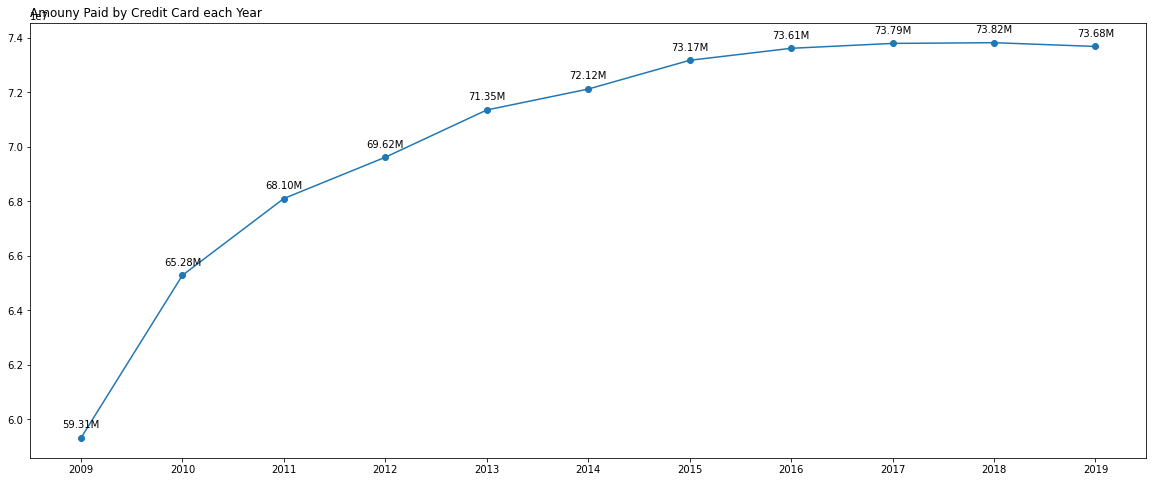

In [7]:
xs = amount_by_year['Year']
ys = amount_by_year['Amount']

plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(xs, ys, marker='o')
plt.xticks(xs) #show every value on x axis
plt.title('Amouny Paid by Credit Card each Year', loc = 'left')

for x,y in zip(xs,ys): #data label

    label = human_format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

#plt.rcParams['figure.figsize'] = [20, 5]

***Explanation***

**Amouny Paid by Credit Card each Year**

From 2009 to 2019, the Amount Pay by Credit Card ranged between around 59.3 M USD to 73.7 M USD. 

The transaction amount has its sharp increase from 2009 until 2015 and smaller to no growth from 2015 to 2019 which can indicate more people weren adopting to using credit card and the higher cost of living.

However, from 2019 onwards, there is a phenomenon called market saturation where the growth in the industry has started to slow down.

In [8]:
#GROUPBY STATE

amount_by_state = merge_df[['Merchant State', 'Amount']].groupby(['Merchant State']).sum()

##amount_by_state = amount_by_state.drop(['CA']) #drop outlier rows

amount_by_state = amount_by_state.sort_values(by=['Amount'], ascending = False) #Order by amount by desceding

amount_by_state.head()

,Amount
Merchant State,
CA,79355762.94
TX,55084650.79
NY,48364899.40
FL,40597848.94
PA,26738559.00


In [9]:
#TOP 5 Spenders

z = []
for y in amount_by_state['Amount']:
    x = human_format(y)
    z.append(x)
    
#amount_by_state['Amount'] = z 

top_5_states = amount_by_state.head()

#HEATMAP
#amount_by_state.head().style.background_gradient(cmap='Greens')

Text(0.0, 1.0, 'Top 5 Spender States Over 10 Years')

<Figure size 432x288 with 0 Axes>

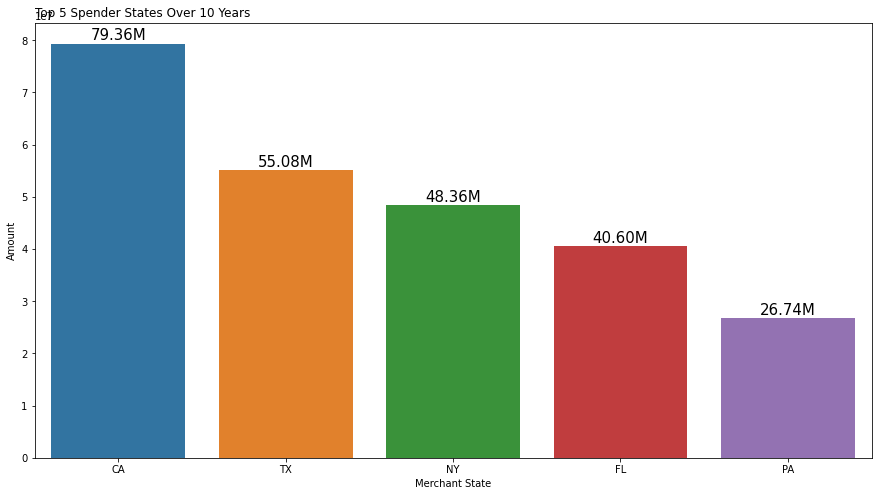

In [10]:
plt.clf()
plt.figure(figsize = (15, 8))
plots = sns.barplot(x  = top_5_states.index, y = top_5_states['Amount'], data = top_5_states)

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(human_format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')




#plt.bar_label(plt.bar(top_5_states.index, top_5_states['Amount'], color ='Green',
#        width = 0.4))
plt.title("Top 5 Spender States Over 10 Years", loc = 'left')

***Explantion***

**Top 5 Spender States Over 10 Years**

The 5 cities with the largest credit-card spending are California, Texas, New York, Florida and Pennsylvania.

With 79.36 Million USD, residents of California had the highest speding over the 10 year time, while Texas and New York came as the second and third.

This also means that these top 5 state spenders are among the highest cost of living states over the 10 years and people will be willing to pay more for the goods and products which, in turn, will lead to more revenue.

In [11]:
#GROUP BY PROGRAM TYPE

amount_by_program = merge_df[['Program Type', 'Amount']].groupby(['Program Type']).sum()

t1 = amount_by_program.head()

t1 = t1.sort_values(by=['Amount'], ascending = False)

Text(0.0, 1.0, 'Top 5 Most Spending Categories')

<Figure size 432x288 with 0 Axes>

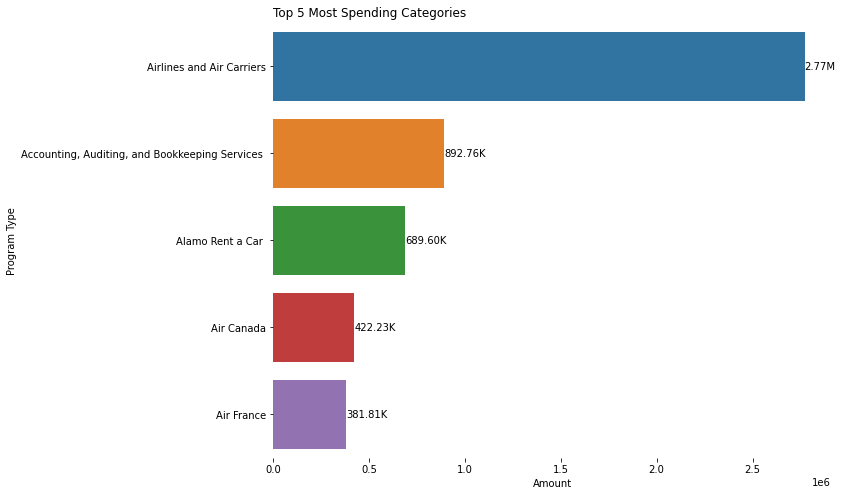

In [12]:
plt.clf()
f, ax = plt.subplots(figsize=(10, 8))
plots = sns.barplot(x  = t1['Amount'], y = t1.index, data = t1)

sns.despine(left=True, bottom=True)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            human_format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

plt.title("Top 5 Most Spending Categories", loc = 'left')

***Explanation***

**Top 5 Most Spending Categories**

People had spent a lot on travel categories, especially air travel. This present an opportunity for credit card companies to campaign a promotion with their exiting credit card to boost a revenue or produce an exclusively new line of credit card with an very exclusive air travel promotion deal only with your company to acquire more customers, and of course even more revenue, and convince them that with air travel it's better to spend with your company because you have a better deal that suits their needs. 


***Summary***

- From 2015 up until 2019,  there is a phenomenon called market saturation in customer banking industry where the lack of growth in total spending happend.

- People from 5 states which are CA, TX, NY, FL and PA tend to pay for the higher price of the same products sold in other states due to higher cost of living.

- Air Travel category is where people spent money on the most

**As a credit card company if you want to gain more customer base and revenue, you should**
 - Focus on customers from top 5 spender states because those are where the money is
 - Doing promotions with air travel related such as 
     - exclusive loung entering at airports, 
     - special discount for airline ticket, 
     - special price for seat upgrade and car rental, or 
     - free pickup from airport to destination and vice versa.